## Datos de strava

- Filtrar y quedarse solo con Activity.Type="Ride"
- Convertir Activity.Date en un objeto posixct.
- Crear una nueva columna que sea día de la semana
- Crear una nueva columna que sea ida o vuelta al trabajo:
    - Tiene que ser un día de lunes a viernes
    - Ida: Entre las 7 y las 9
    - Vuelta: Entre las 14 y las 19

Para la columna Moving.Time: Calcular tiempo medio de ida, tiempo medio de vuelta, varianza y Boxplot de ambos. 

Ayuda: 
* Para elegir el día de la semana usa la función weekdays del paquete lubridate()
* Para parsear la fecha, usa el siguiente formato: "%b %d, %Y, %I:%M:%S %p"

In [89]:
Sys.setlocale("LC_ALL","en_EN")
strava = read.csv("data/activities_strava.csv")
strava$Activity.Date <- as.POSIXct(strava$Activity.Date, format='%b %d, %Y, %I:%M:%S %p')

Warning message in Sys.setlocale("LC_ALL", "en_EN"):
"OS reports request to set locale to "en_EN" cannot be honored"


[1] ""

In [7]:
str(strava)

'data.frame':	95 obs. of  77 variables:
 $ Activity.ID                                                                                   : num  2.58e+09 2.58e+09 2.58e+09 2.61e+09 2.63e+09 ...
 $ Activity.Date                                                                                 : POSIXct, format: "2019-08-01 15:51:15" "2019-08-02 05:53:50" ...
 $ Activity.Name                                                                                 : chr  "Afternoon Ride" "Morning Ride" "Afternoon Ride" "Afternoon Ride" ...
 $ Activity.Type                                                                                 : chr  "Ride" "Ride" "Ride" "Ride" ...
 $ Activity.Description                                                                          : logi  NA NA NA NA NA NA ...
 $ Elapsed.Time                                                                                  : int  50436 1745 944 4170 1744 1046 508 1825 1198 2365 ...
 $ Distance                                      

In [8]:
dim(strava)
strava <- strava[strava$Activity.Type=='Ride', ]
dim(strava)

[1] 95 77

[1] 92 77

In [16]:
#Lo anterior es equivalente a filtrar con dplyr:
library(dplyr)
strava %>% filter(Activity.Type=='Ride') -> strava

In [44]:
library(lubridate)
strava$weekday <- as.factor(weekdays(strava$Activity.Date))
table(strava$weekday)


   Friday    Monday    Sunday  Thursday   Tuesday Wednesday 
       24        11         1        31        20         5 

In [45]:
strava$ida_vuelta <- NA

In [46]:
indice_ida <- which( (hour(strava$Activity.Date)>=6 & hour(strava$Activity.Date)<=9) & 
        !(weekdays(strava$Activity.Date) %in% c('Sunday','Saturday')) )
strava$ida_vuelta[indice_ida] <- "Ida"

In [47]:
indice_vuelta <- which( (hour(strava$Activity.Date)>=13 & hour(strava$Activity.Date)<=19) & 
        !(weekdays(strava$Activity.Date) %in% c('Sunday','Saturday')) )
strava$ida_vuelta[indice_vuelta] <- "Vuelta"

In [48]:
table(strava$ida_vuelta)


   Ida Vuelta 
    22     45 

In [49]:
strava$ida_vuelta <- as.factor(strava$ida_vuelta)

In [50]:
summary(strava[,c('ida_vuelta','weekday','Activity.Date','Moving.Time')])

  ida_vuelta      weekday   Activity.Date                  Moving.Time   
 Ida   :22   Friday   :24   Min.   :2019-08-01 15:51:15   Min.   :  191  
 Vuelta:45   Monday   :11   1st Qu.:2019-09-06 12:00:58   1st Qu.: 1196  
 NA's  :25   Sunday   : 1   Median :2019-10-13 09:30:55   Median : 1539  
             Thursday :31   Mean   :2019-12-16 20:07:05   Mean   : 1965  
             Tuesday  :20   3rd Qu.:2020-02-06 12:57:29   3rd Qu.: 1976  
             Wednesday: 5   Max.   :2020-10-09 13:03:13   Max.   :38641  

In [53]:
# Media total que coincide con el summary
mean(strava$Moving.Time)
sum(strava$Moving.Time)/length(strava$Moving.Time)

[1] 1964.652

[1] 1964.652

In [56]:
# Media de Moving.Time en el viaje de ida:
mean(strava$Moving.Time[strava$ida_vuelta=='Ida'], na.rm=T)/60

[1] 31.90227

In [59]:
# Media de Moving.Time en el viaje de vuelta:
strava %>% filter(ida_vuelta=='Vuelta') %>% pull(Moving.Time) %>% mean()/60

[1] 33.80593

In [62]:
# varianza de Moving.Time en el viaje de ida:
var(strava$Moving.Time[strava$ida_vuelta=='Ida'], na.rm=T)

[1] 156555.2

In [64]:
# varianza de Moving.Time en el viaje de vuelta:
var(strava$Moving.Time[strava$ida_vuelta=='Vuelta'], na.rm=T)

[1] 31276509

In [65]:
library(ggplot2)

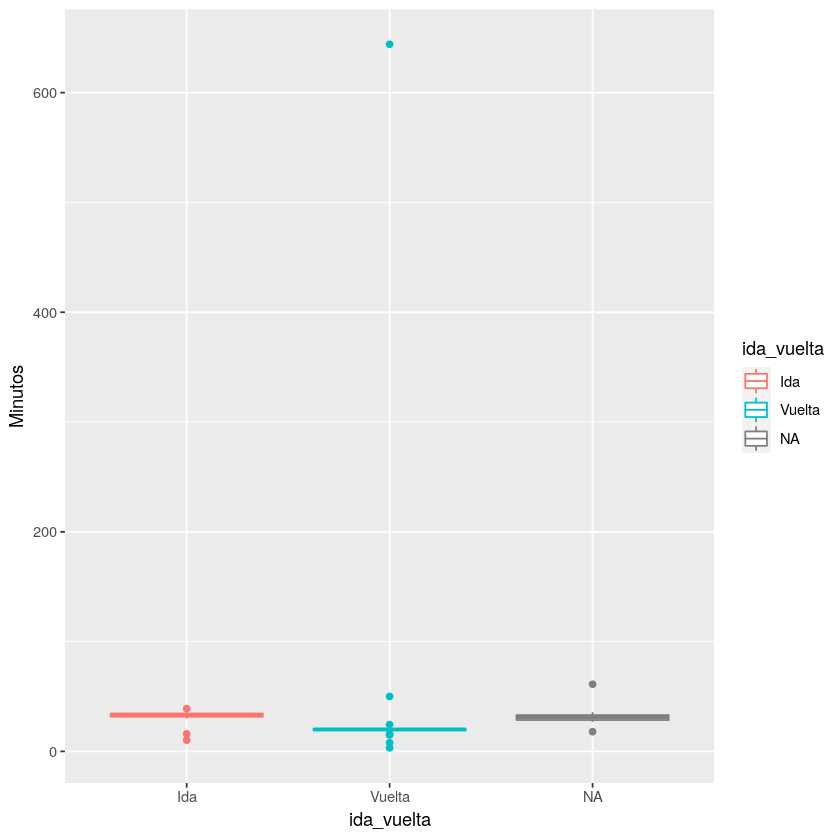

In [67]:
ggplot(strava, aes(y=Moving.Time/60, x=ida_vuelta, color=ida_vuelta))+
geom_boxplot()+ylab('Minutos')

In [68]:
max(strava$Moving.Time)

[1] 38641

In [69]:
strava[which.max(strava$Moving.Time), c('ida_vuelta','weekday','Activity.Date','Moving.Time')]

,ida_vuelta,weekday,Activity.Date,Moving.Time
,<fct>,<fct>,<dttm>,<dbl>
1,Vuelta,Thursday,2019-08-01 15:51:15,38641


In [70]:
strava_clean<-strava[strava$Moving.Time<38000,]

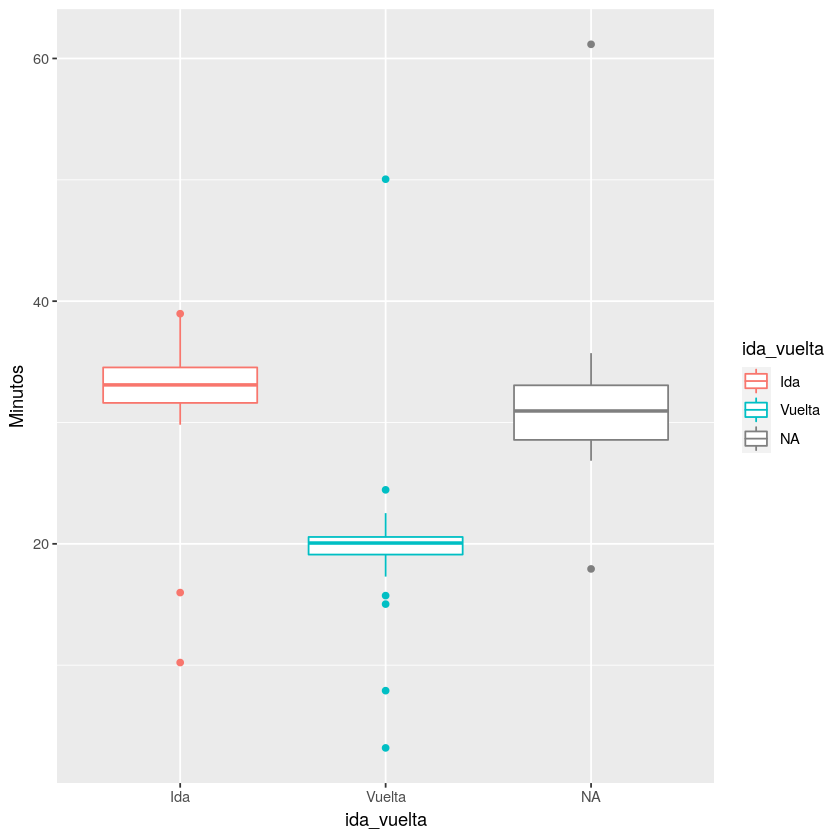

In [71]:
ggplot(strava_clean, aes(y=Moving.Time/60, x=ida_vuelta, color=ida_vuelta))+
geom_boxplot()+ylab('Minutos')

In [75]:
print("Varianza Ida")
var(strava_clean$Moving.Time[strava_clean$ida_vuelta=='Ida'], na.rm=T)
print("Varianza vuelta")
var(strava_clean$Moving.Time[strava_clean$ida_vuelta=='Vuelta'], na.rm=T)

[1] "Varianza Ida"


[1] 156555.2

[1] "Varianza vuelta"


[1] 121280.9

In [77]:
print("Media Ida")
mean(strava_clean$Moving.Time[strava_clean$ida_vuelta=='Ida'], na.rm=T)/60
print("Media vuelta")
mean(strava_clean$Moving.Time[strava_clean$ida_vuelta=='Vuelta'], na.rm=T)/60

[1] "Media Ida"


[1] 31.90227

[1] "Media vuelta"


[1] 19.9375

In [78]:
print("Tiempo mediano de ida sin limpiar:")
median(strava$Moving.Time[strava$ida_vuelta=='Vuelta'], na.rm=T)/60
print("Tiempo mediano de ida limpio:")
median(strava_clean$Moving.Time[strava_clean$ida_vuelta=='Vuelta'], na.rm=T)/60

[1] "Tiempo mediano de ida sin limpiar:"


[1] 20.08333

[1] "Tiempo mediano de ida limpio:"


[1] 20.06667

 ## CSV edad española
 
 Usando el CSV del INE.¿Cual es la media de edad de la población española? ¿y la mediana? ¿la moda?

Ayuda, función de la media:
\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [8]:
library(dplyr)
library(tidyr)
poblacion_raw<-read.csv("data/9663bsc.csv",skip=0,fileEncoding="ISO-8859-1",
                        header=T, sep=';',stringsAsFactor=F)

poblacion_raw$Total <- as.numeric(gsub('\\.','',poblacion_raw$Total))
poblacion <- poblacion_raw %>% 
 pivot_wider(names_from = Sexo, values_from = Total)  %>% 
 mutate(edad=as.numeric(gsub("año(s|)","",Edad.simple))) %>% 
 drop_na() %>%
 select(-c(Periodo,Edad.simple))%>%
 rename(Total='Ambos sexos') %>% 
 arrange(edad)
#arrange(desc(Edad))
head(poblacion)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Total,Hombres,Mujeres,edad
<dbl>,<dbl>,<dbl>,<dbl>
338786,173576,165210,0
363341,186861,176480,1
382059,196311,185748,2
408287,210331,197956,3
431472,221780,209692,4
443170,228110,215060,5


Calculo de la moda

In [10]:
poblacion[which.max(poblacion$Total),]

Total,Hombres,Mujeres,edad
<dbl>,<dbl>,<dbl>,<dbl>
812938,409360,403579,44


In [12]:
paste("La moda de la edad es:",poblacion[which.max(poblacion$Total),"edad"],"años")

[1] "La moda de la edad es: 44 años"

Calulo de la mediana:

In [21]:
poblacion$ratio <- poblacion$Total/sum(poblacion$Total)

poblacion$cum_ratio <- cumsum(poblacion$ratio)

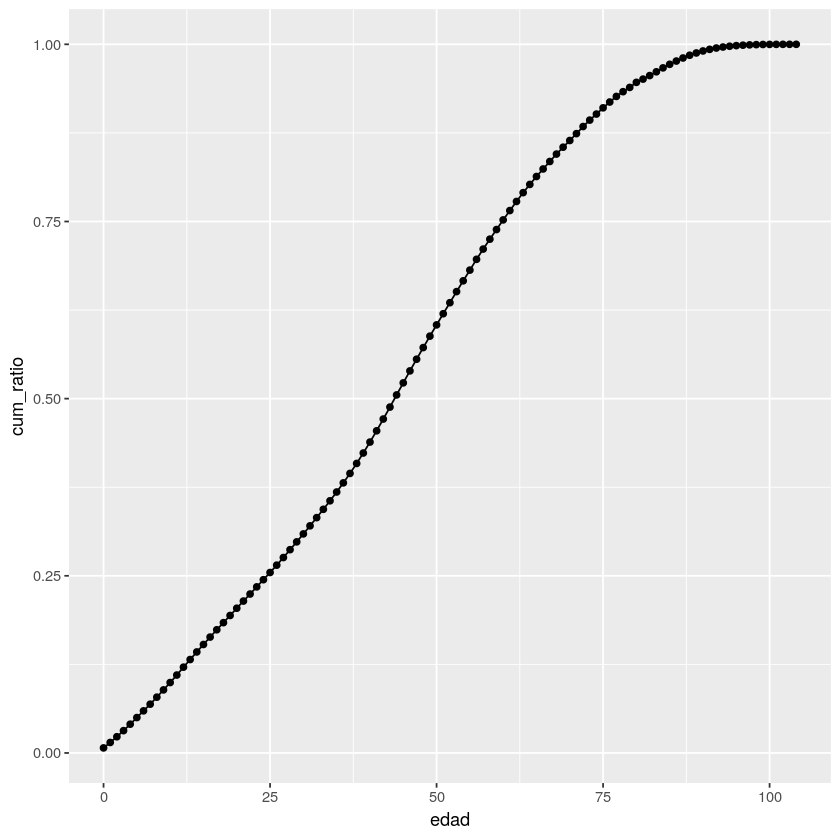

In [25]:
library(ggplot2)
ggplot(poblacion, aes(x=edad,y=cum_ratio))+geom_line()+geom_point()

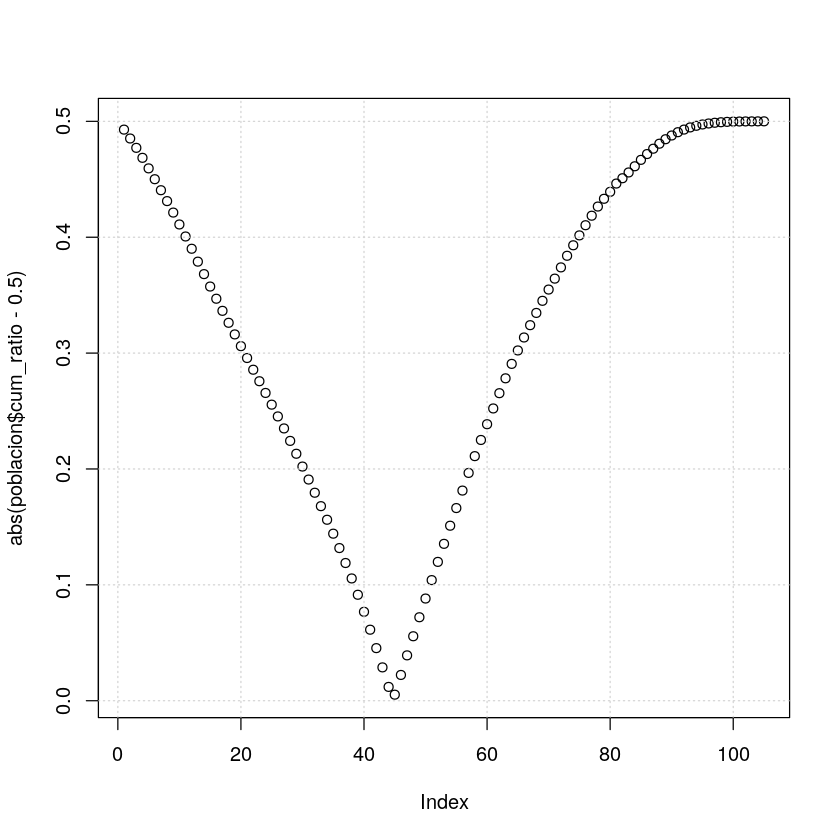

In [31]:
plot(abs(poblacion$cum_ratio-0.5))
grid()

El valor de la mediana es:

In [33]:
poblacion$edad[which.min(abs(poblacion$cum_ratio-0.5))]

[1] 44

El valor de la media es:
\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [43]:
sum(poblacion$edad*poblacion$Total)/sum(poblacion$Total)

[1] 43.30595